In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [17]:
# Load CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


print("Shape of the training dataset,number of images and resolution:",train_images.shape)
print("Distint training labels:",np.unique(train_labels))




Shape of the training dataset,number of images and resolution: (50000, 32, 32, 3)
Distint training labels: [0 1 2 3 4 5 6 7 8 9]


label for the image 9 truck


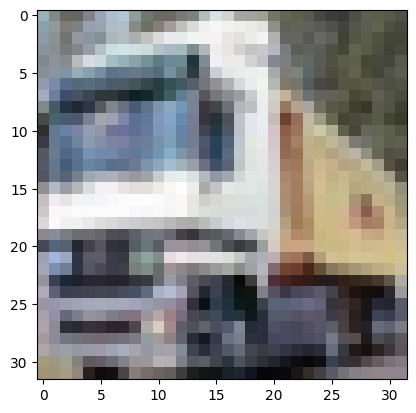

In [18]:
labels=['airplane','automobile','bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship','truck']
plt.figure()
plt.imshow(train_images[1],cmap='gray')
print("label for the image",train_labels[1][0],labels[train_labels[1][0]])
plt.show()

In [19]:
# Create the CNN model
model = keras.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Train the model

model.fit(train_images, train_labels, epochs=10, validation_split=0.1)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc*100)

Epoch 1/10
1407/1407 [==============================] - 117s 82ms/step - loss: 1.8492 - accuracy: 0.4614 - val_loss: 1.2412 - val_accuracy: 0.5530
Epoch 2/10
1407/1407 [==============================] - 117s 83ms/step - loss: 1.1455 - accuracy: 0.5973 - val_loss: 1.1517 - val_accuracy: 0.5962
Epoch 3/10
1407/1407 [==============================] - 112s 80ms/step - loss: 0.9979 - accuracy: 0.6511 - val_loss: 1.0168 - val_accuracy: 0.6468
Epoch 4/10
1407/1407 [==============================] - 116s 82ms/step - loss: 0.8946 - accuracy: 0.6875 - val_loss: 1.0428 - val_accuracy: 0.6304
Epoch 5/10
1407/1407 [==============================] - 114s 81ms/step - loss: 0.8246 - accuracy: 0.7110 - val_loss: 0.9453 - val_accuracy: 0.6752
Epoch 6/10
1407/1407 [==============================] - 120s 85ms/step - loss: 0.7442 - accuracy: 0.7404 - val_loss: 0.9546 - val_accuracy: 0.6908
Epoch 7/10
1407/1407 [==============================] - 114s 81ms/step - loss: 0.6951 - accuracy: 0.7545 - val_loss: 1

Augmentation Technique 1: Zooming

Augmentation Technique 1 : Zoom 20%


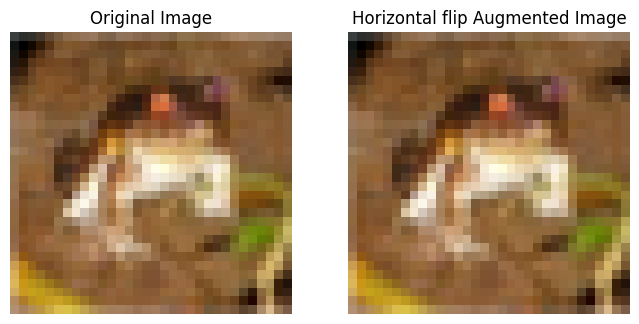

In [21]:
image = train_images[0]

image = np.expand_dims(image, axis=0)

datagen_zoom = ImageDataGenerator(
    horizontal_flip=True,
    fill_mode='nearest'
)

augmented_images = []

for batch in datagen_zoom.flow(image, batch_size=1):
    augmented_images.append(batch[0])
    if len(augmented_images) == 1:
        break

print("Augmentation Technique 1 : Zoom 20%")

fig, axs = plt.subplots(1, 2, figsize=(8, 4))


axs[0].imshow(image[0])
axs[0].set_title('Original Image')
axs[0].axis('off')


axs[1].imshow(augmented_images[0].astype('uint8'))
axs[1].set_title('Horizontal flip Augmented Image')
axs[1].axis('off')

plt.show()

Augmentation Technique 2 : Rotation 10 degree


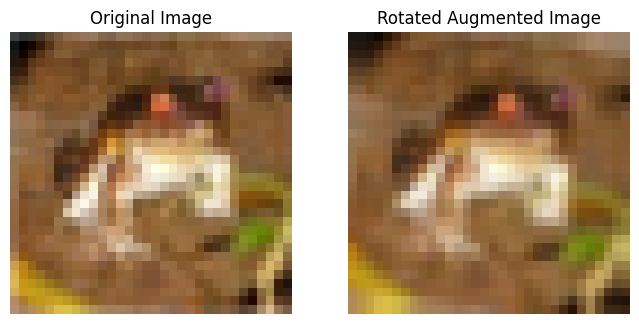

In [22]:
image = image[0]

image = np.expand_dims(image, axis=0)

datagen_rotation = ImageDataGenerator(
    rotation_range=10,
    fill_mode='nearest'
)

augmented_images = []

for batch in datagen_rotation.flow(image, batch_size=1):
    augmented_images.append(batch[0])
    if len(augmented_images) == 1:
        break

print("Augmentation Technique 2 : Rotation 10 degree")

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image[0])
axs[0].set_title('Original Image')
axs[0].axis('off')


axs[1].imshow(augmented_images[0].astype('uint8'))
axs[1].set_title('Rotated Augmented Image')
axs[1].axis('off')

plt.show()

In [23]:
# ImageDataGenerator instance for augmentation
generator = ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

# Function to apply augmentation to an image and return the augmented images
def augment_image(img, num_augmented_images):
    img = np.expand_dims(img, axis=0)
    augmented_images = []

    for batch in generator.flow(img, batch_size=1):
        augmented_images.append(batch[0])
        if len(augmented_images) == num_augmented_images:
            break

    return augmented_images

augmented_train_images = []
augmented_train_labels = []

for i in range(len(train_images)):
    original_image = train_images[i]
    original_label = train_labels[i]
    augmented_train_images.append(original_image)
    augmented_train_labels.append(original_label)
    augmented_images = augment_image(original_image, num_augmented_images=1)
    augmented_train_images.extend(augmented_images)
    augmented_train_labels.extend([original_label] * len(augmented_images))


augmented_train_images = np.array(augmented_train_images)
augmented_train_labels = np.array(augmented_train_labels)





In [24]:
print("shape of expanded training dataset",augmented_train_images.shape)

shape of expanded training dataset (100000, 32, 32, 3)


In [25]:
model.fit(augmented_train_images, augmented_train_labels, epochs=12, validation_split=0.1)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc*100)

Epoch 1/12
2813/2813 [==============================] - 252s 89ms/step - loss: 0.7306 - accuracy: 0.7497 - val_loss: 0.9154 - val_accuracy: 0.7014
Epoch 2/12
2813/2813 [==============================] - 230s 82ms/step - loss: 0.6577 - accuracy: 0.7738 - val_loss: 0.9762 - val_accuracy: 0.6938
Epoch 3/12
2813/2813 [==============================] - 229s 81ms/step - loss: 0.6178 - accuracy: 0.7884 - val_loss: 0.9285 - val_accuracy: 0.7027
Epoch 4/12
2813/2813 [==============================] - 227s 81ms/step - loss: 0.5816 - accuracy: 0.7993 - val_loss: 1.0367 - val_accuracy: 0.7051
Epoch 5/12
2813/2813 [==============================] - 228s 81ms/step - loss: 0.5494 - accuracy: 0.8109 - val_loss: 1.0307 - val_accuracy: 0.6943
Epoch 6/12
2813/2813 [==============================] - 227s 81ms/step - loss: 0.5250 - accuracy: 0.8195 - val_loss: 1.0473 - val_accuracy: 0.6965
Epoch 7/12
2813/2813 [==============================] - 232s 83ms/step - loss: 0.5008 - accuracy: 0.8284 - val_loss: 1

In [28]:
model_dropout = keras.Sequential()


model_dropout.add(layers.Conv2D(32, (3, 3), padding='same',input_shape=augmented_train_images.shape[1:]))
model_dropout.add(layers.Activation('relu'))
model_dropout.add(layers.Conv2D(32, (3, 3)))
model_dropout.add(layers.Activation('relu'))
model_dropout.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_dropout.add(Dropout(0.25))

model_dropout.add(layers.Conv2D(64, (3, 3), padding='same'))
model_dropout.add(layers.Activation('relu'))
model_dropout.add(layers.Conv2D(64, (3, 3)))
model_dropout.add(layers.Activation('relu'))
model_dropout.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_dropout.add(Dropout(0.25))

model_dropout.add(layers.Flatten())
model_dropout.add(layers.Dense(512))
model_dropout.add(layers.Activation('relu'))
model_dropout.add(layers.Dropout(0.5))

model_dropout.add(layers.Dense(10))
model_dropout.add(layers.Activation('softmax'))

model_dropout.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_10 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [14]:
model_dropout.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# augmented_train_images=augmented_train_images.astype('float32')
# augmented_train_labels=augmented_train_labels.astype('float32')
# augmented_train_images=augmented_train_images/255
# augmented_train_labels=augmented_train_labels/255

In [15]:
model_dropout.fit(augmented_train_images, augmented_train_labels,epochs=30, validation_split=0.1)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc*100)

Epoch 1/30
2813/2813 [==============================] - 438s 155ms/step - loss: 1.6875 - accuracy: 0.4102 - val_loss: 1.2855 - val_accuracy: 0.5501
Epoch 2/30
2813/2813 [==============================] - 446s 158ms/step - loss: 1.2726 - accuracy: 0.5506 - val_loss: 1.0646 - val_accuracy: 0.6350
Epoch 3/30
2813/2813 [==============================] - 436s 155ms/step - loss: 1.1648 - accuracy: 0.5923 - val_loss: 1.0322 - val_accuracy: 0.6450
Epoch 4/30
2813/2813 [==============================] - 440s 157ms/step - loss: 1.0904 - accuracy: 0.6196 - val_loss: 0.9429 - val_accuracy: 0.6696
Epoch 5/30
2813/2813 [==============================] - 452s 161ms/step - loss: 1.0559 - accuracy: 0.6321 - val_loss: 0.8852 - val_accuracy: 0.6926
Epoch 6/30
2813/2813 [==============================] - 454s 161ms/step - loss: 1.0250 - accuracy: 0.6449 - val_loss: 0.9035 - val_accuracy: 0.6856
Epoch 7/30
2813/2813 [==============================] - 452s 161ms/step - loss: 1.0068 - accuracy: 0.6516 - val_